In [ ]:
!pip install spotipy
!pip install pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize': (12,8)})

warnings.filterwarnings('ignore')

In [ ]:
df_songs = pd.read_csv('/content/drive/MyDrive/Group 3 - AI1707 : Music recommendation/Data/even_more_songs_to_cluster.csv')
df_songs.head()

,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,Nate's Theme 2.0,Uncharted 2: Among Thieves (Original Video Gam...,7AeuCduXts5efoVLam7dUk,Greg Edmonson,2O0YGVBPONB6lPJYxb0q3w,2xJCwA0WygA4INcY2tMQ5g,46.0,105515.0,0.0440,0.4020,1.0,0.1200,7.0,0.294,-14.639,0.245,0.927,0.395,127.025
1,Opening​~​Bombing Mission (Final Fantasy VII),Distant Worlds: Music from Final Fantasy,04uEX0wzsnA5UcaEtxcbal,Nobuo Uematsu,3V79CTgRnsDdJSTqKitROv,0hEExwWtYKCAKdUXRCZ4JV,47.0,243293.0,0.0512,0.2460,0.0,0.3160,9.0,0.158,-9.295,0.759,0.941,0.575,64.305
2,Halo,Halo: Original Soundtrack,6GSXmRwERX2erR5xuLTajj,Martin O'Donnell,5oERdzrfb6kmNMzPNINZib,0htrx26DcVDcyXErXyJsTo,4.0,262160.0,0.0444,0.0374,1.0,0.0976,0.0,0.312,-14.271,0.255,0.884,0.419,96.134
3,Pokémon®,Level 3,2KHrrZCAkI8HOIJpOqLzET,Video Games Live,6dZAVi5PugDwlAnH8KMEGl,74RXECEEdc945gowRY4ebj,50.0,254747.0,0.0446,0.2550,1.0,0.1550,10.0,0.307,-8.468,0.243,0.922,0.635,106.927
4,God of War,God of War (PlayStation Soundtrack),3AieuV7WztobSMYG86Hdez,Bear McCreary,2ifvIECHAlEgPMBuBOJ0lG,6ZMwwuUOx8kefl32gWOjtY,60.0,246626.0,0.0357,0.1440,1.0,0.1020,8.0,0.202,-10.112,0.291,0.940,0.440,143.847


In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14675 non-null  object 
 1   album             14675 non-null  object 
 2   album_id          14675 non-null  object 
 3   artist            14675 non-null  object 
 4   artist_id         14675 non-null  object 
 5   id                14675 non-null  object 
 6   popularity        14675 non-null  float64
 7   duration_ms       14675 non-null  float64
 8   speechiness       14675 non-null  float64
 9   valence           14675 non-null  float64
 10  mode              14675 non-null  float64
 11  liveness          14675 non-null  float64
 12  key               14675 non-null  float64
 13  danceability      14675 non-null  float64
 14  loudness          14675 non-null  float64
 15  acousticness      14675 non-null  float64
 16  instrumentalness  14675 non-null  float6

In [ ]:
df_songs = df_songs.dropna()

In [ ]:
df_songs.describe()

,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
count,14675.000000,1.467500e+04,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000,14675.000000
mean,45.593663,2.249107e+05,0.091641,0.524291,0.605588,0.205508,5.277956,0.602181,-8.123553,0.325616,0.130228,0.630594,120.958270
std,19.613458,8.966387e+04,0.094471,0.257202,0.488741,0.188685,3.553397,0.171062,4.848793,0.316528,0.284576,0.243354,29.299062
min,0.000000,3.356700e+04,0.000000,0.000000,0.000000,0.013600,0.000000,0.000000,-42.238000,0.000001,0.000000,0.000255,0.000000
25%,34.000000,1.797520e+05,0.037900,0.322000,0.000000,0.094800,2.000000,0.491000,-9.911000,0.034800,0.000000,0.472000,97.381000
50%,48.000000,2.109200e+05,0.053600,0.534000,1.000000,0.126000,5.000000,0.618000,-6.934000,0.220000,0.000031,0.667000,121.053000
75%,59.000000,2.506260e+05,0.102000,0.736000,1.000000,0.256500,8.000000,0.728000,-4.939000,0.576000,0.018950,0.830000,139.933000
max,99.000000,3.243938e+06,0.949000,0.988000,1.000000,0.990000,11.000000,0.981000,0.858000,0.996000,0.984000,0.999000,234.107000


In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/Group 3 - AI1707 : Music recommendation/Data/vi_liraa_songs.csv')
df_user.head()

,name,id,popularity,duration_ms,album,album_id,artist,artist_id,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,Only Wanna Sing (Live),0UK511K1sEmtdcnD1ylhCJ,50,195480,Youth Revival,1IGVfSUmT7Eg1YElv0q2MA,Hillsong Young & Free,7m4gF38CPATtHrk5HS42WZ,0.0278,0.2290,1,0.716,7,0.545,-6.555,0.013600,0.000013,0.822,130.051
1,Might Sound Wild - Live,6ulXU2MtTqhblpftVbVM1y,51,375668,People (Live),3bMPLTN3fYcLAO2DJwPoBK,Hillsong UNITED,74cb3MG0x0BOnYNW1uXYnM,0.0439,0.1970,1,0.667,2,0.321,-7.225,0.000836,0.000000,0.808,195.073
2,Another In The Fire - Live,2txJKgDAXfLe9ipMG3VhOh,63,393352,People (Live),3bMPLTN3fYcLAO2DJwPoBK,Hillsong UNITED,74cb3MG0x0BOnYNW1uXYnM,0.0351,0.0943,1,0.138,0,0.452,-7.831,0.000596,0.000000,0.684,135.058
3,Broken Vessels (Amazing Grace),35WtFQK3iG2WPjstuuKaVc,65,568791,No Other Name,4qKQSjyrG1mS84P5tgX7ks,Hillsong Worship,3SgHzT552wy2W8pNLaLk24,0.0281,0.0871,1,0.721,7,0.379,-7.051,0.293000,0.000009,0.489,140.937
4,Amazing Grace,6I0BNA8vvGSXztFCwVfdjn,45,213186,He Touched Me,4BcD1RBud4U2DAqByYFBi2,Elvis Presley,43ZHCT0cAZBISjO8DG9PnE,0.0309,0.4170,1,0.107,7,0.190,-13.538,0.894000,0.002360,0.281,183.461


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              85 non-null     object 
 1   id                85 non-null     object 
 2   popularity        85 non-null     int64  
 3   duration_ms       85 non-null     int64  
 4   album             85 non-null     object 
 5   album_id          85 non-null     object 
 6   artist            85 non-null     object 
 7   artist_id         85 non-null     object 
 8   speechiness       85 non-null     float64
 9   valence           85 non-null     float64
 10  mode              85 non-null     int64  
 11  liveness          85 non-null     float64
 12  key               85 non-null     int64  
 13  danceability      85 non-null     float64
 14  loudness          85 non-null     float64
 15  acousticness      85 non-null     float64
 16  instrumentalness  85 non-null     float64
 17 

In [ ]:
df_user = df_user.dropna()

In [ ]:
df_user.describe()

,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,55.741176,190429.411765,0.148705,0.637240,0.505882,0.272815,5.894118,0.697588,-6.627188,0.386771,0.010057,0.688647,127.572094
std,20.399085,62586.943129,0.146036,0.249768,0.502933,0.261869,3.518737,0.146913,2.818952,0.278197,0.057489,0.180631,29.259806
min,0.000000,106711.000000,0.027800,0.087100,0.000000,0.045000,0.000000,0.190000,-14.176000,0.000596,0.000000,0.234000,71.180000
25%,47.000000,161600.000000,0.049700,0.478000,0.000000,0.090400,4.000000,0.611000,-8.107000,0.115000,0.000000,0.581000,100.044000
50%,63.000000,177931.000000,0.094800,0.682000,1.000000,0.140000,6.000000,0.716000,-6.309000,0.381000,0.000000,0.723000,129.998000
75%,69.000000,207157.000000,0.197000,0.863000,1.000000,0.344000,9.000000,0.823000,-4.780000,0.607000,0.000006,0.832000,150.064000
max,93.000000,568791.000000,0.752000,0.974000,1.000000,0.982000,11.000000,0.880000,0.111000,0.945000,0.405000,0.971000,195.073000


In [ ]:
df_songs.columns

Index(['name', 'album', 'album_id', 'artist', 'artist_id', 'id', 'popularity',
       'duration_ms', 'speechiness', 'valence', 'mode', 'liveness', 'key',
       'danceability', 'loudness', 'acousticness', 'instrumentalness',
       'energy', 'tempo'],
      dtype='object')

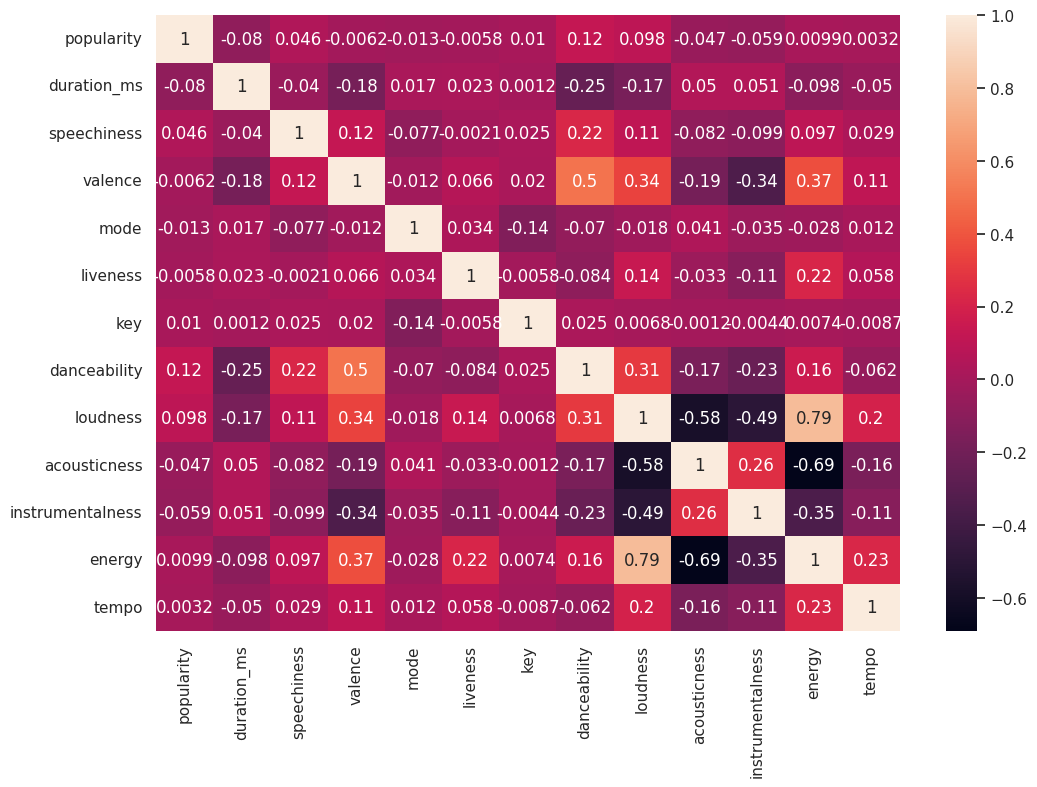

In [ ]:
ax = sns.heatmap(df_songs.corr(), annot=True)
plt.show()

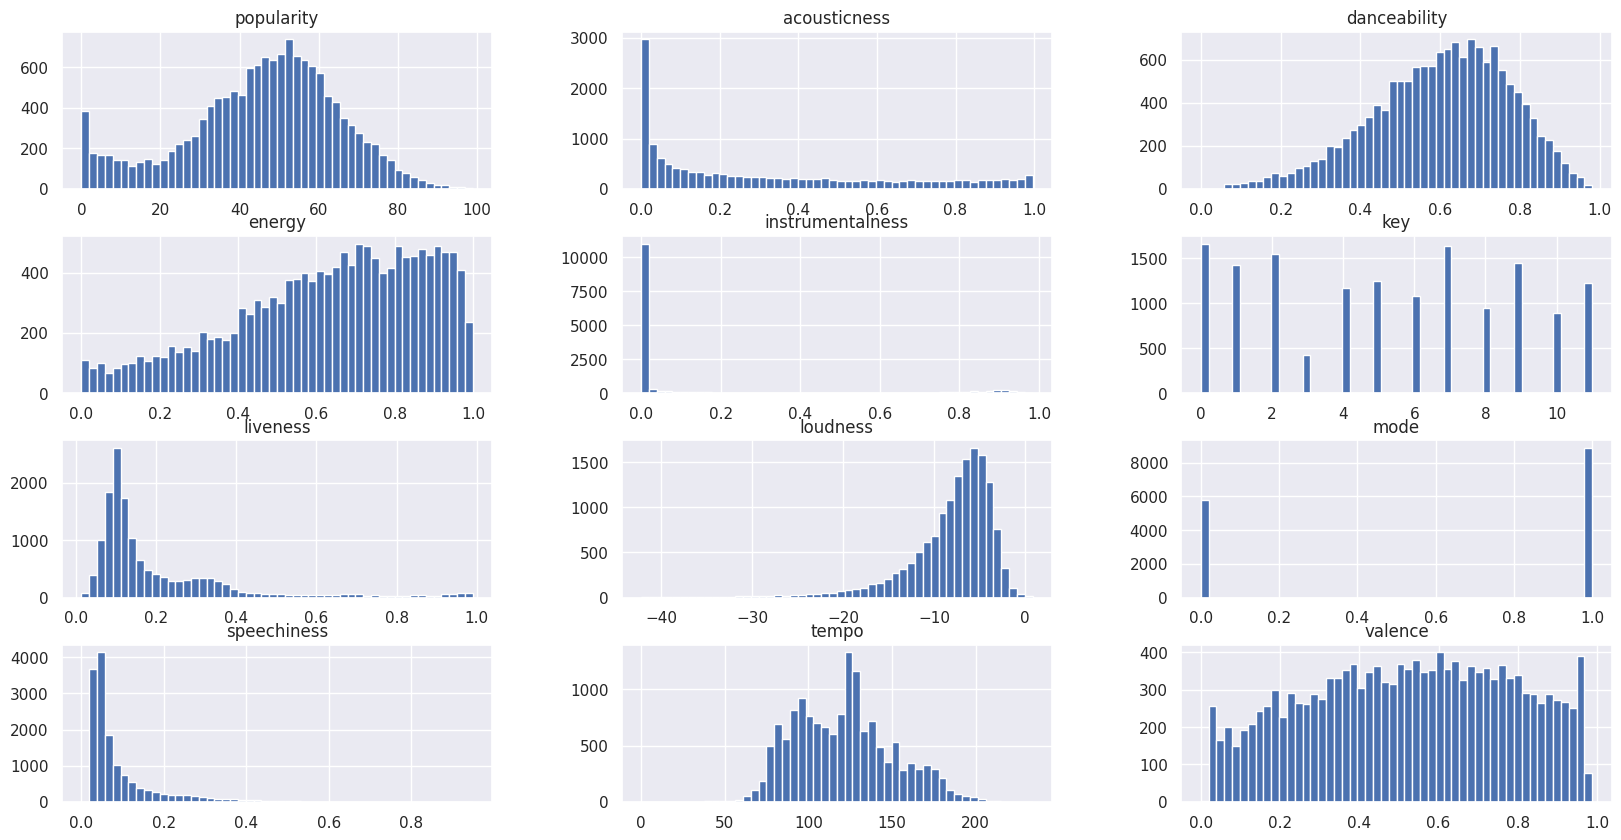

In [ ]:
df_songs[['popularity', 'acousticness', 'danceability', 'energy',
           'instrumentalness', 'key','liveness','loudness', 'mode', 'speechiness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
plt.show()

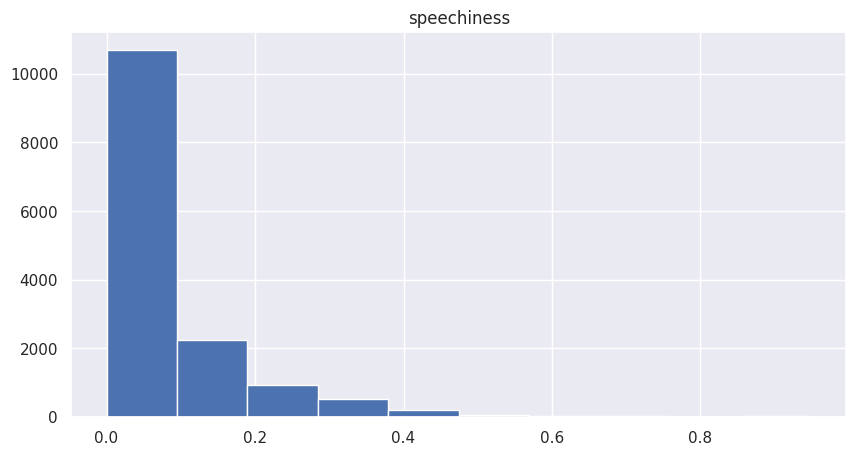

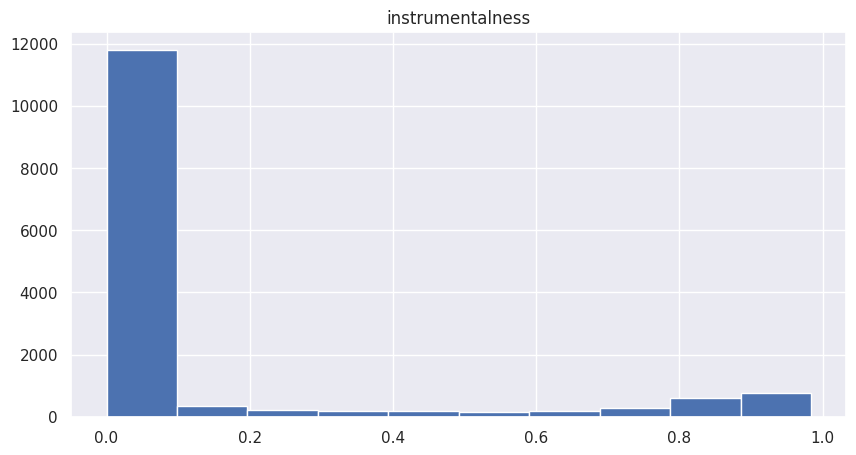

In [ ]:
df_songs[['speechiness']].hist(figsize=(10,5))
df_songs[['instrumentalness']].hist(figsize=(10,5))
plt.show()

In [ ]:
columns_to_cluster = ['acousticness', 'danceability', 'energy',
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness']

## Preprocessing data

In [ ]:
# Currently using MinMaxScaler, due to minor inertia values in KMeans
ss = StandardScaler()

songs_scaled = ss.fit_transform(df_songs[columns_to_cluster])
print(songs_scaled[0,:])

user_scaled = ss.fit_transform(df_user[columns_to_cluster])
print(user_scaled[0,:])

[-0.25469591 -1.80163944 -0.96814551  2.79995192 -0.45319686 -0.47548295
  0.2070693  -0.50430378 -1.34377155]
[-1.34935022 -1.04479379  0.74264327 -0.17575058  1.7024333  -1.64417439
  0.08522331 -0.83282494  0.02576017]


In [ ]:
mms = MinMaxScaler()

songs_scaled = mms.fit_transform(df_songs[columns_to_cluster])
print(songs_scaled[0,:])

user_scaled = mms.fit_transform(df_user[columns_to_cluster])
print(user_scaled[0,:])

[0.24598291 0.29969419 0.39524103 0.94207317 0.10897173 0.40688259
 0.54259377 0.04636459 0.64040746]
[1.37695308e-02 5.14492754e-01 7.97829037e-01 3.13580247e-05
 7.16115261e-01 1.59995490e-01 4.75176160e-01 0.00000000e+00
 5.33421992e-01]


In [ ]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled',
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)

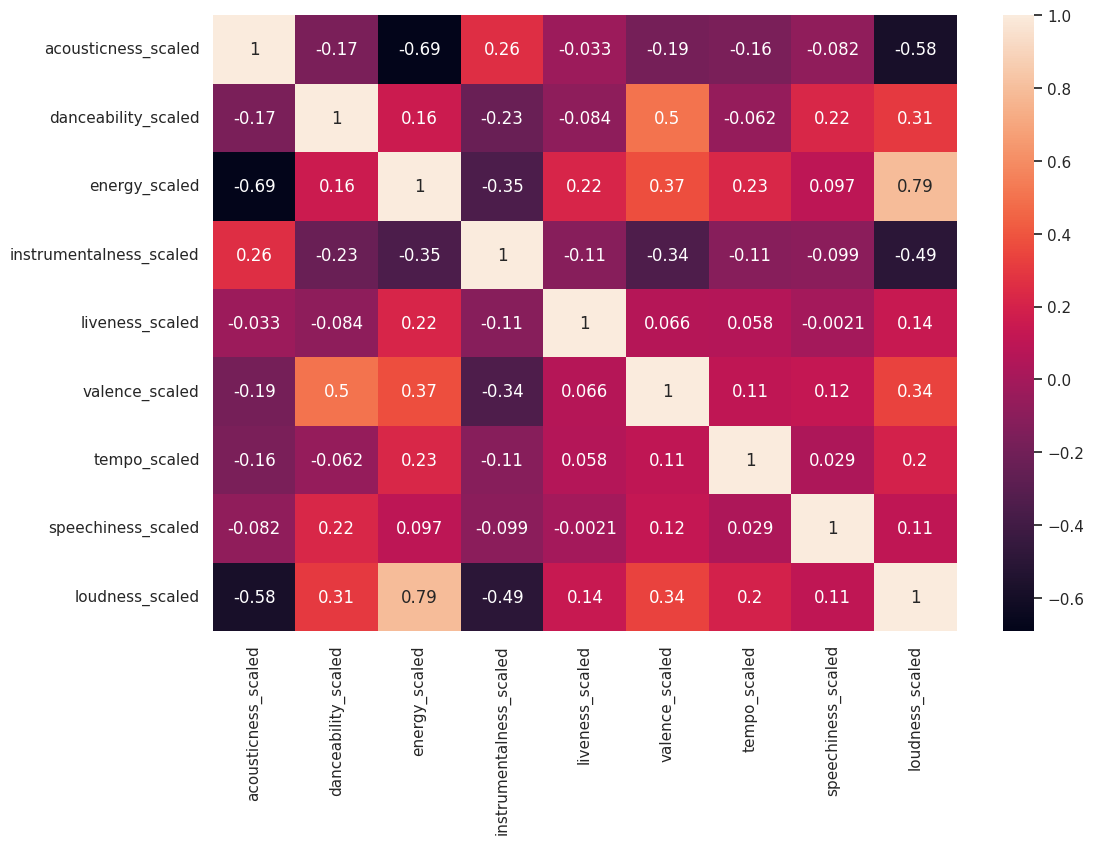

In [ ]:
ax = sns.heatmap(df_songs_scaled.corr(), annot=True)
plt.show()

## Training the model

In [ ]:
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(songs_scaled)
    preds = km.predict(songs_scaled)
    centers = km.cluster_centers_
    ssd.append(km.inertia_)
    score = silhouette_score(songs_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.3547601613727376
Number of Clusters = 3, Silhouette Score = 0.2813309336057415
Number of Clusters = 4, Silhouette Score = 0.22071863336441144
Number of Clusters = 5, Silhouette Score = 0.2307146032052978
Number of Clusters = 6, Silhouette Score = 0.24569650337331422
Number of Clusters = 7, Silhouette Score = 0.22208067020364328
Number of Clusters = 8, Silhouette Score = 0.21588447489770593
Number of Clusters = 9, Silhouette Score = 0.21083597751957686
Number of Clusters = 10, Silhouette Score = 0.18563275386481506
Number of Clusters = 11, Silhouette Score = 0.17338070554538104
Number of Clusters = 12, Silhouette Score = 0.1702959427267993
Number of Clusters = 13, Silhouette Score = 0.1708764354302148
Number of Clusters = 14, Silhouette Score = 0.16911896395834247
Number of Clusters = 15, Silhouette Score = 0.16638743562479671
Number of Clusters = 16, Silhouette Score = 0.16613396003803427
Number of Clusters = 17, Silhouette Score = 0.1606864

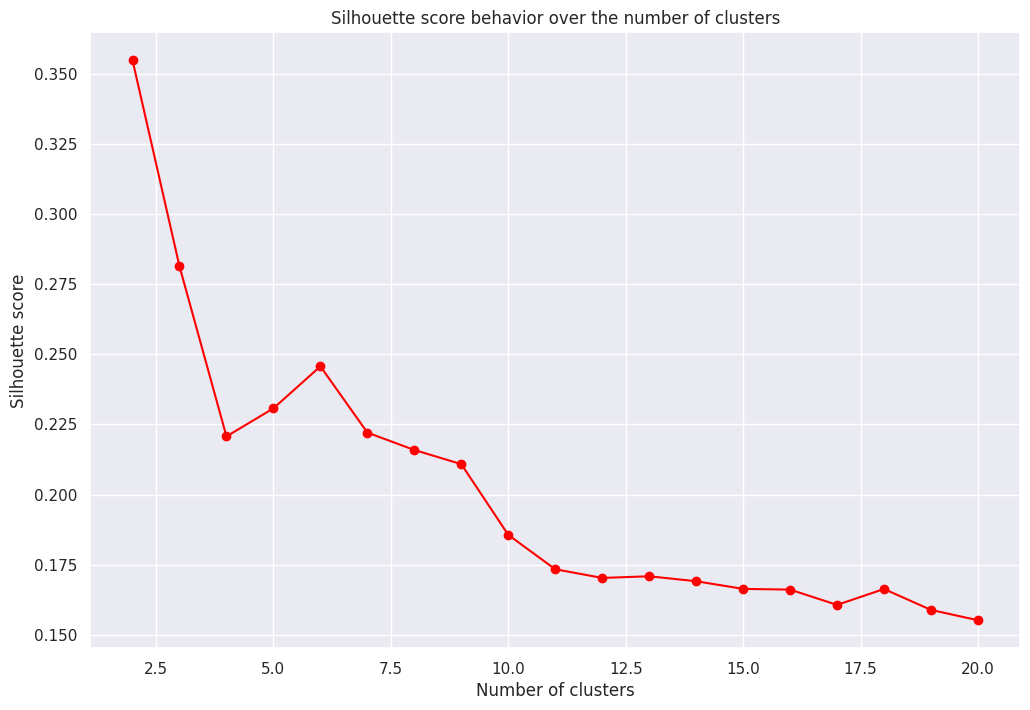

In [ ]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()

In [ ]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

Number of Clusters = 2, Sum of Squared Distances = 4243.464046814964
Number of Clusters = 3, Sum of Squared Distances = 3517.756671061279
Number of Clusters = 4, Sum of Squared Distances = 3022.1000977851427
Number of Clusters = 5, Sum of Squared Distances = 2677.044646415694
Number of Clusters = 6, Sum of Squared Distances = 2382.7193564638737
Number of Clusters = 7, Sum of Squared Distances = 2191.1192999778286
Number of Clusters = 8, Sum of Squared Distances = 2052.24299329686
Number of Clusters = 9, Sum of Squared Distances = 1963.6369912149476
Number of Clusters = 10, Sum of Squared Distances = 1888.2341829931415
Number of Clusters = 11, Sum of Squared Distances = 1825.0157096896091
Number of Clusters = 12, Sum of Squared Distances = 1767.124962432209
Number of Clusters = 13, Sum of Squared Distances = 1711.494846950217
Number of Clusters = 14, Sum of Squared Distances = 1667.9497231486052
Number of Clusters = 15, Sum of Squared Distances = 1622.6849779574718
Number of Clusters = 

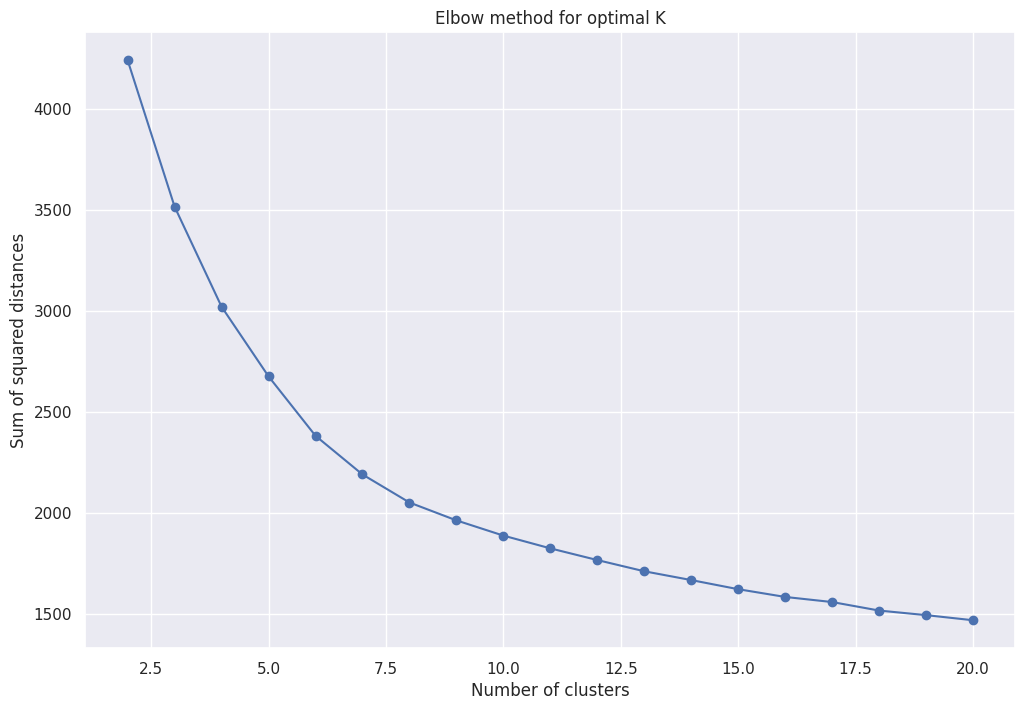

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [ ]:
k=6

model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [1 4 1 1 1 1 4 4 4 4]


## Visualizing the clusters

Amount of songs per cluster

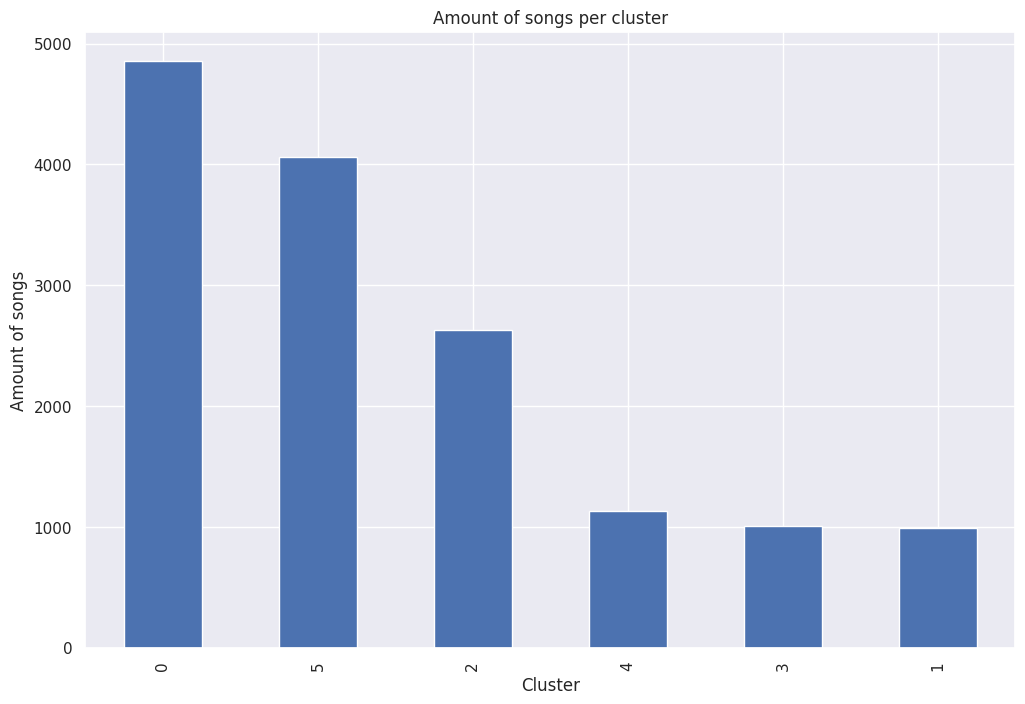

In [ ]:
df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [ ]:
display(df_songs_scaled['cluster'].value_counts())
minor_cluster = df_songs_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

0    4857
5    4064
2    2626
4    1131
3    1006
1     991
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  991


Sampling songs from each cluster

In [ ]:
df_songs_joined = pd.concat([df_songs,df_songs_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['artist','name','album']].sample(frac=1).head())

,artist,name,album
cluster,,,
0.0,Ismail Mubarak,Allah Kateb Le,Allah Kateb Le
0.0,Alesso,In The Middle,In The Middle
0.0,Inner Circle,Sweat (A La La La La Long),Blazzin' Fire
0.0,AYA A.K.A PANDA,Phone number,Anemone
0.0,No Doubt,Just A Girl,The Singles Collection


,artist,name,album
cluster,,,
1.0,George FitzGerald,Passing Trains,All That Must Be
1.0,Black Joe Lewis & The Honeybears,Nothing but a Cliché,The Difference Between Me & You
1.0,Guns N' Roses,Welcome To The Jungle,Greatest Hits
1.0,Anki,Memories,Circadian
1.0,saud,Letting Go (Intro),013-310


,artist,name,album
cluster,,,
2.0,Kozypop,Affogato,"Seoul Vibes, Pt​. 4"
2.0,Iron & Wine,Naked As We Came,Our Endless Numbered Days
2.0,Ituana,Seven Nation Army,Seven Nation Army
2.0,Omy de Oro,Subimos de Rango,Subimos de Rango
2.0,Robert Wilkins,That's No Way To Get Along,Ghost World Soundtrack


,artist,name,album
cluster,,,
3.0,TroyBoi,Do You?,"V!BEZ, Vol. 3"
3.0,Avine Vinny,Boa Sorte Aí,Naturalmente
3.0,Iron Maiden,The Trooper,Piece of Mind
3.0,VERIVERY,Tag Tag Tag,VERI-CHILL
3.0,Emicida,Triunfo,Pra Quem Já Mordeu um Cachorro por Comida Até ...


,artist,name,album
cluster,,,
4.0,Marcus Roberts,The Man I Love,Gershwin For Lovers
4.0,Bill Charlap Trio,Spring Can Really Hang You Up The Most,"Uptown, Downtown"
4.0,Marius Schiffer,Die Brücke,Kafka
4.0,Gustav Mahler,Symphony No.5 In C Sharp Minor: 4. Adagietto (...,Mahler: Symphony No.5
4.0,Takeshi Furukawa,Overture: Lore,The Last Guardian Soundtrack (Japan Deluxe Edi...


,artist,name,album
cluster,,,
5.0,Diviner,Against the Grain,Realms of Time
5.0,Hammerfall,Dominion,Dominion
5.0,A Banca 021,Lua,Lua
5.0,Sam Smith,How Do You Sleep?,How Do You Sleep?
5.0,Sebastian Ingrosso,Reload - Vocal Version / Radio Edit,Reload (Vocal Version / Radio Edit)


## Applying PCA to visualize the clusters

In [ ]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(songs_scaled)
pca.explained_variance_ratio_.sum()

0.7465468761686231

In [ ]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,0.546341,0.584405,0.377686,1
1,0.833466,0.429883,0.201917,4
2,0.654484,0.744301,0.128108,1
3,0.447699,0.701606,0.288023,1
4,0.637521,0.734465,0.189543,1


Undersampling clusters

In [ ]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

1    991
4    991
5    991
0    991
2    991
3    991
Name: cluster, dtype: int64

Visualizing clusters in 2 dimensions

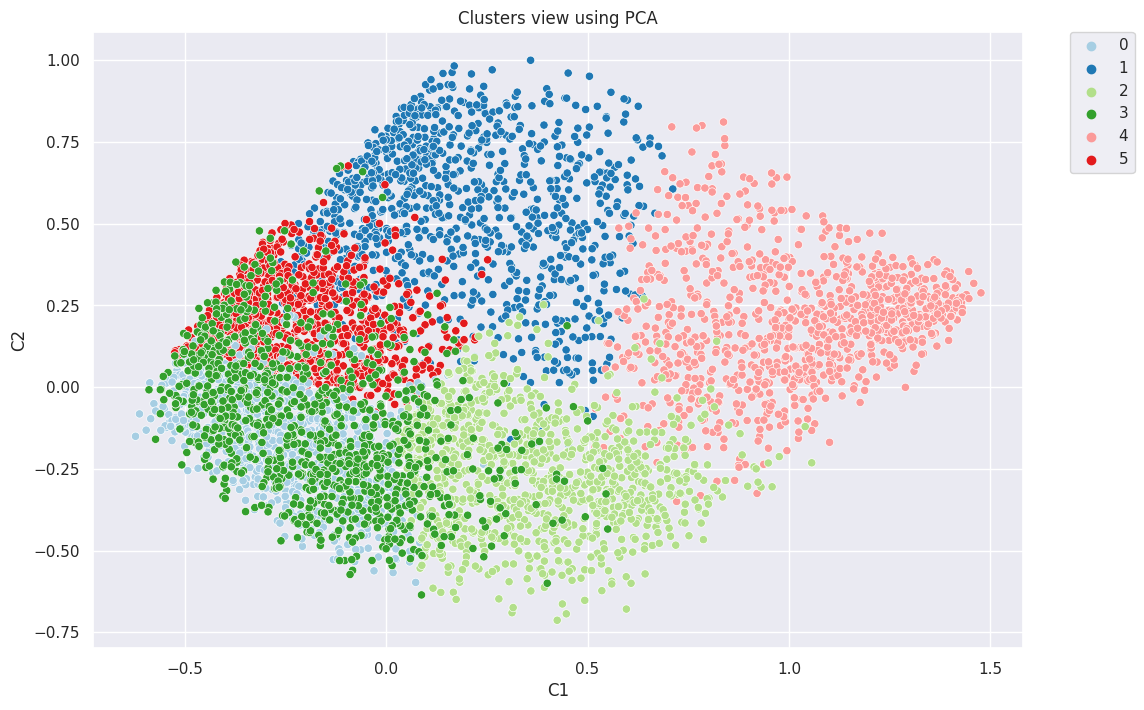

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

## Predicting users clusters

In [ ]:
user_pred = model.predict(user_scaled)
print('10 first users clusters: ', user_pred[:10])

10 first users clusters:  [3 5 5 3 2 0 0 2 2 3]


Amount of songs in the users clusters

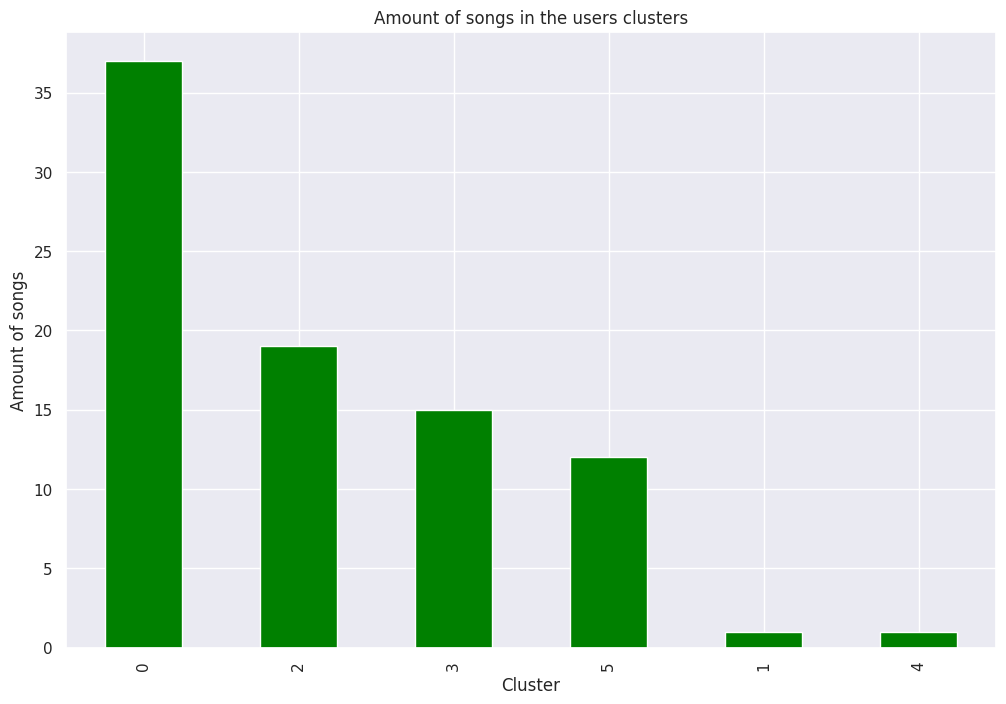

In [ ]:
user_cluster = pd.DataFrame(user_scaled, columns=columns_to_cluster_scaled)
user_cluster['cluster'] = user_pred

user_cluster['cluster'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs in the users clusters')
plt.show()


Sample of songs in each cluster

In [ ]:
df_user_songs_joined = pd.concat([df_user,user_cluster], axis=1).set_index('cluster')
for cluster in user_cluster['cluster'].unique():
    display(df_user_songs_joined.loc[cluster, ['artist','name','album']].sample(frac=1).head())

,artist,name,album
cluster,,,
3,Hillsong Young & Free,Only Wanna Sing (Live),Youth Revival
3,Turma do Pagode,Lancinho - Ao Vivo,O Som das Multidões
3,Leo Santana,Vidro Fumê - Ao Vivo,Vidro Fumê (Ao Vivo)
3,Turma do Pagode,Pente e Rala - Ao Vivo,Mania do Brasil (Ao Vivo)
3,Exaltasamba,Tá Vendo Aquela Lua,25 Anos (Ao Vivo)


,artist,name,album
cluster,,,
5,Gaab,Tem Café,Melhor Viagem
5,Lincoln & Duas Medidas,La Raba,La Raba
5,Djonga,LEAL,Ladrão
5,Gaab,Cuidado,Melhor Viagem
5,Hillsong UNITED,Another In The Fire - Live,People (Live)


,artist,name,album
cluster,,,
2,A Banca Records,Outro Dia,Outro Dia
2,Zé Neto & Cristiano,Notificação Preferida - Ao Vivo,Esquece o Mundo Lá Fora (Ao Vivo) - Deluxe
2,blackbear,idfc - Tarro Remix,idfc (Tarro Remix)
2,Elvis Presley,Amazing Grace,He Touched Me
2,MC Kevin o Chris,Ela É do Tipo,Ela É do Tipo


,artist,name,album
cluster,,,
0,Diego & Victor Hugo,Infarto,Querosene e o Violão
0,Gil Bala,"Minha Pomba, Pt. 2","Gil Bala Não Para, Só Dá um Tempo"
0,Banda Grafith,"Bonita, Lindinha e Sagaz - Cover",Grafith 2018
0,La Furia,Manoel,Manoel
0,Dennis DJ,Só Você,Só Você


artist    Satara
album       1941
name        1941
Name: 1, dtype: object

name           Devil Eyes
artist    Hippie Sabotage
album          Providence
Name: 4, dtype: object

## Recommending songs

Analysing the percentage of songs per cluster

In [ ]:
df_user_songs_joined.reset_index(inplace=True)
cluster_pct = df_user_songs_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0

display(cluster_pct)
print('Total songs: ', int(cluster_pct.round(0).sum()))

0    8.705882
2    4.470588
3    3.529412
5    2.823529
1    0.235294
4    0.235294
Name: cluster, dtype: float64

Total songs:  20


In [ ]:
df_songs_joined.reset_index(inplace=True)
df_songs_joined.head(3)

,cluster,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,...,tempo,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled
0,1.0,Nate's Theme 2.0,Uncharted 2: Among Thieves (Original Video Gam...,7AeuCduXts5efoVLam7dUk,Greg Edmonson,2O0YGVBPONB6lPJYxb0q3w,2xJCwA0WygA4INcY2tMQ5g,46.0,105515.0,0.0440,...,127.025,0.245983,0.299694,0.395241,0.942073,0.108972,0.406883,0.542594,0.046365,0.640407
1,4.0,Opening​~​Bombing Mission (Final Fantasy VII),Distant Worlds: Music from Final Fantasy,04uEX0wzsnA5UcaEtxcbal,Nobuo Uematsu,3V79CTgRnsDdJSTqKitROv,0hEExwWtYKCAKdUXRCZ4JV,47.0,243293.0,0.0512,...,64.305,0.762048,0.161060,0.575467,0.956301,0.309709,0.248988,0.274682,0.053952,0.764410
2,1.0,Halo,Halo: Original Soundtrack,6GSXmRwERX2erR5xuLTajj,Martin O'Donnell,5oERdzrfb6kmNMzPNINZib,0htrx26DcVDcyXErXyJsTo,4.0,262160.0,0.0444,...,96.134,0.256023,0.318043,0.419271,0.898374,0.086030,0.037854,0.410641,0.046786,0.648947


Adding the percentage to the users dataset

In [ ]:
df_user_songs_joined['cluster_pct'] = df_user_songs_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_songs_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_songs_joined.head(3)

,cluster,name,id,popularity,duration_ms,album,album_id,artist,artist_id,speechiness,...,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo,cluster_pct
0,3,Only Wanna Sing (Live),0UK511K1sEmtdcnD1ylhCJ,50,195480,Youth Revival,1IGVfSUmT7Eg1YElv0q2MA,Hillsong Young & Free,7m4gF38CPATtHrk5HS42WZ,0.0278,...,1,0.716,7,0.545,-6.555,0.013600,0.000013,0.822,130.051,3.529412
1,5,Might Sound Wild - Live,6ulXU2MtTqhblpftVbVM1y,51,375668,People (Live),3bMPLTN3fYcLAO2DJwPoBK,Hillsong UNITED,74cb3MG0x0BOnYNW1uXYnM,0.0439,...,1,0.667,2,0.321,-7.225,0.000836,0.000000,0.808,195.073,2.823529
2,5,Another In The Fire - Live,2txJKgDAXfLe9ipMG3VhOh,63,393352,People (Live),3bMPLTN3fYcLAO2DJwPoBK,Hillsong UNITED,74cb3MG0x0BOnYNW1uXYnM,0.0351,...,1,0.138,0,0.452,-7.831,0.000596,0.000000,0.684,135.058,2.823529


Getting mixed samples from the original dataset and inserting in a new playlist, based on the percentage of songs present in each user cluster



In [ ]:
playlist = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    songs = df_songs_joined[df_songs_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    playlist = pd.concat([playlist,songs], ignore_index=True)
    if len(playlist) > 20 :
        flag = 20 - len(playlist)
        playlist = playlist[:flag]
playlist.head(3)

,cluster,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,...,tempo,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled
0,0.0,She's A Sweet One,"Calling All Blues - The Chief, Profile & USA R...",3WqFy7VvZvKmyFRGgAp6WZ,Junior Wells,78CBFzwo7wwNaaTYVP5btK,2Cg3GUkhjX96nO4p2WRlIa,50.0,181786.0,0.0542,...,122.863,0.150601,0.718654,0.483352,0.026931,0.192954,0.721660,0.524816,0.057113,0.696793
1,0.0,Too Much To Ask,Flicker (Deluxe),7ahctQBwcSxDdP0fRAPo2p,Niall Horan,1Hsdzj7Dlq2I7tHP7501T4,39jXnbACjiaiTwwhsr5sY5,77.0,223043.0,0.0397,...,153.711,0.002659,0.636086,0.757696,0.000002,0.179639,0.665992,0.517157,0.031191,0.911871
2,0.0,Vingativa,Vingativa,5o28H7OZcQy5hQ2WrqqncZ,Marvin,2eZo9QaElCGetkocbfVcwY,5jp1vwd5AaECP4uh4YImiL,47.0,172852.0,0.1010,...,150.044,0.377509,0.700306,0.861827,0.000010,0.042913,0.490891,0.448645,0.590095,0.935261


## User EDA vs New playlist

In [ ]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cluster                  20 non-null     float64
 1   name                     20 non-null     object 
 2   album                    20 non-null     object 
 3   album_id                 20 non-null     object 
 4   artist                   20 non-null     object 
 5   artist_id                20 non-null     object 
 6   id                       20 non-null     object 
 7   popularity               20 non-null     float64
 8   duration_ms              20 non-null     float64
 9   speechiness              20 non-null     float64
 10  valence                  20 non-null     float64
 11  mode                     20 non-null     float64
 12  liveness                 20 non-null     float64
 13  key                      20 non-null     float64
 14  danceability             20 

In [ ]:
playlist[['name', 'artist', 'album', 'cluster']]

,name,artist,album,cluster
0,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",0.0
1,Too Much To Ask,Niall Horan,Flicker (Deluxe),0.0
2,Vingativa,Marvin,Vingativa,0.0
3,Piensa En Mí,Grupo Mojado,Sueño Y Realidad,0.0
4,You Really Got Me,The Kinks,The Ultimate Collection,0.0
5,心に穴が空いた,ヨルシカ,エルマ,0.0
6,Rave Automotiva,Dj GBR,Rave Automotiva,0.0
7,Riders on the Storm,The Doors,L.A. Woman,0.0
8,E O Samba Sambou,Bruno Ribas,Sambas De Enredo Das Escolas De Samba 2019,0.0
9,Halleluya,Johnny Drille,Halleluya,2.0


In [ ]:
playlist.describe()

,cluster,popularity,duration_ms,speechiness,valence,mode,liveness,key,danceability,loudness,...,tempo,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.750000,47.500000,225683.500000,0.081370,0.576000,0.65000,0.266280,5.400000,0.588250,-7.065900,...,125.021550,0.302620,0.580785,0.724404,0.002404,0.237597,0.579706,0.504463,0.097703,0.821717
std,1.860249,19.063605,64927.927286,0.111875,0.231904,0.48936,0.279682,3.939009,0.142282,2.826737,...,29.695658,0.259805,0.125387,0.190035,0.006663,0.252120,0.204204,0.113555,0.135524,0.069964
min,0.000000,5.000000,133813.000000,0.027500,0.178000,0.00000,0.046800,0.000000,0.343000,-12.209000,...,80.013000,0.000052,0.349643,0.410260,0.000000,0.034002,0.183198,0.341780,0.028978,0.696793
25%,0.000000,37.250000,180599.500000,0.042600,0.406500,0.00000,0.087900,1.750000,0.502000,-8.922500,...,99.221000,0.119728,0.488022,0.533665,0.000000,0.076096,0.411437,0.423828,0.044889,0.773053
50%,2.000000,48.500000,226271.500000,0.052950,0.607500,1.00000,0.113000,5.500000,0.570000,-6.934000,...,133.412500,0.239959,0.598879,0.744680,0.000004,0.101803,0.631579,0.520681,0.055796,0.819194
75%,3.000000,58.000000,248136.500000,0.077600,0.724000,1.00000,0.366250,9.000000,0.681750,-4.809250,...,145.995500,0.420933,0.690367,0.877096,0.000159,0.361174,0.722419,0.578562,0.081770,0.878782
max,5.000000,77.000000,434720.000000,0.547000,0.964000,1.00000,0.956000,11.000000,0.882000,-2.551000,...,179.305000,0.811245,0.741081,0.963955,0.026931,0.965178,0.972672,0.765910,0.590095,0.935261


Comparing features between user x playlist

In [ ]:
def plot_recomendations_similarities(data, variables):
    root = int(np.ceil(np.sqrt(len(variables))))
    fig, axis = plt.subplots(nrows=root, ncols=root, figsize=(15, 15))

    numeric_categories = ["0.0 - 0.2",
                           "0.2 - 0.4",
                           "0.4 - 0.6",
                           "0.6 - 0.8",
                           "0.8 - 1.0",
                           ]
    fig.suptitle('Comparing distributions for the songs features')
    for idx, column in enumerate(variables):
        i, j = idx % root, idx // root
        ax = axis[j][i]

        grouped = data.groupby('user')[[column, 'user']]

        for user, group in grouped:
            sns.distplot(group[column], ax=ax, label=user, bins=20)
        ax.legend()
    plt.show()

In [ ]:
df_user_songs_joined['user'] = 'User'
playlist['user'] = 'Playlist'

user = df_user_songs_joined.drop(columns='cluster_pct')

display(user.head(1))
playlist.head(1)

,cluster,name,id,popularity,duration_ms,album,album_id,artist,artist_id,speechiness,...,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo,user
0,3,Only Wanna Sing (Live),0UK511K1sEmtdcnD1ylhCJ,50,195480,Youth Revival,1IGVfSUmT7Eg1YElv0q2MA,Hillsong Young & Free,7m4gF38CPATtHrk5HS42WZ,0.0278,...,1,0.716,7,0.545,-6.555,0.0136,0.000013,0.822,130.051,User


,cluster,name,album,album_id,artist,artist_id,id,popularity,duration_ms,speechiness,...,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,user
0,0.0,She's A Sweet One,"Calling All Blues - The Chief, Profile & USA R...",3WqFy7VvZvKmyFRGgAp6WZ,Junior Wells,78CBFzwo7wwNaaTYVP5btK,2Cg3GUkhjX96nO4p2WRlIa,50.0,181786.0,0.0542,...,0.150601,0.718654,0.483352,0.026931,0.192954,0.72166,0.524816,0.057113,0.696793,Playlist


In [ ]:
user_sampled = pd.DataFrame(columns=user.columns)

for c in playlist.cluster.unique():
    user_sampled = user_sampled.append(user[user.cluster == c].sample(n=playlist[playlist.cluster == c].count().values[0]))
user_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 75 to 73
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           20 non-null     object 
 1   name              20 non-null     object 
 2   id                20 non-null     object 
 3   popularity        20 non-null     object 
 4   duration_ms       20 non-null     object 
 5   album             20 non-null     object 
 6   album_id          20 non-null     object 
 7   artist            20 non-null     object 
 8   artist_id         20 non-null     object 
 9   speechiness       20 non-null     float64
 10  valence           20 non-null     float64
 11  mode              20 non-null     object 
 12  liveness          20 non-null     float64
 13  key               20 non-null     object 
 14  danceability      20 non-null     float64
 15  loudness          20 non-null     float64
 16  acousticness      20 non-null     float64
 17

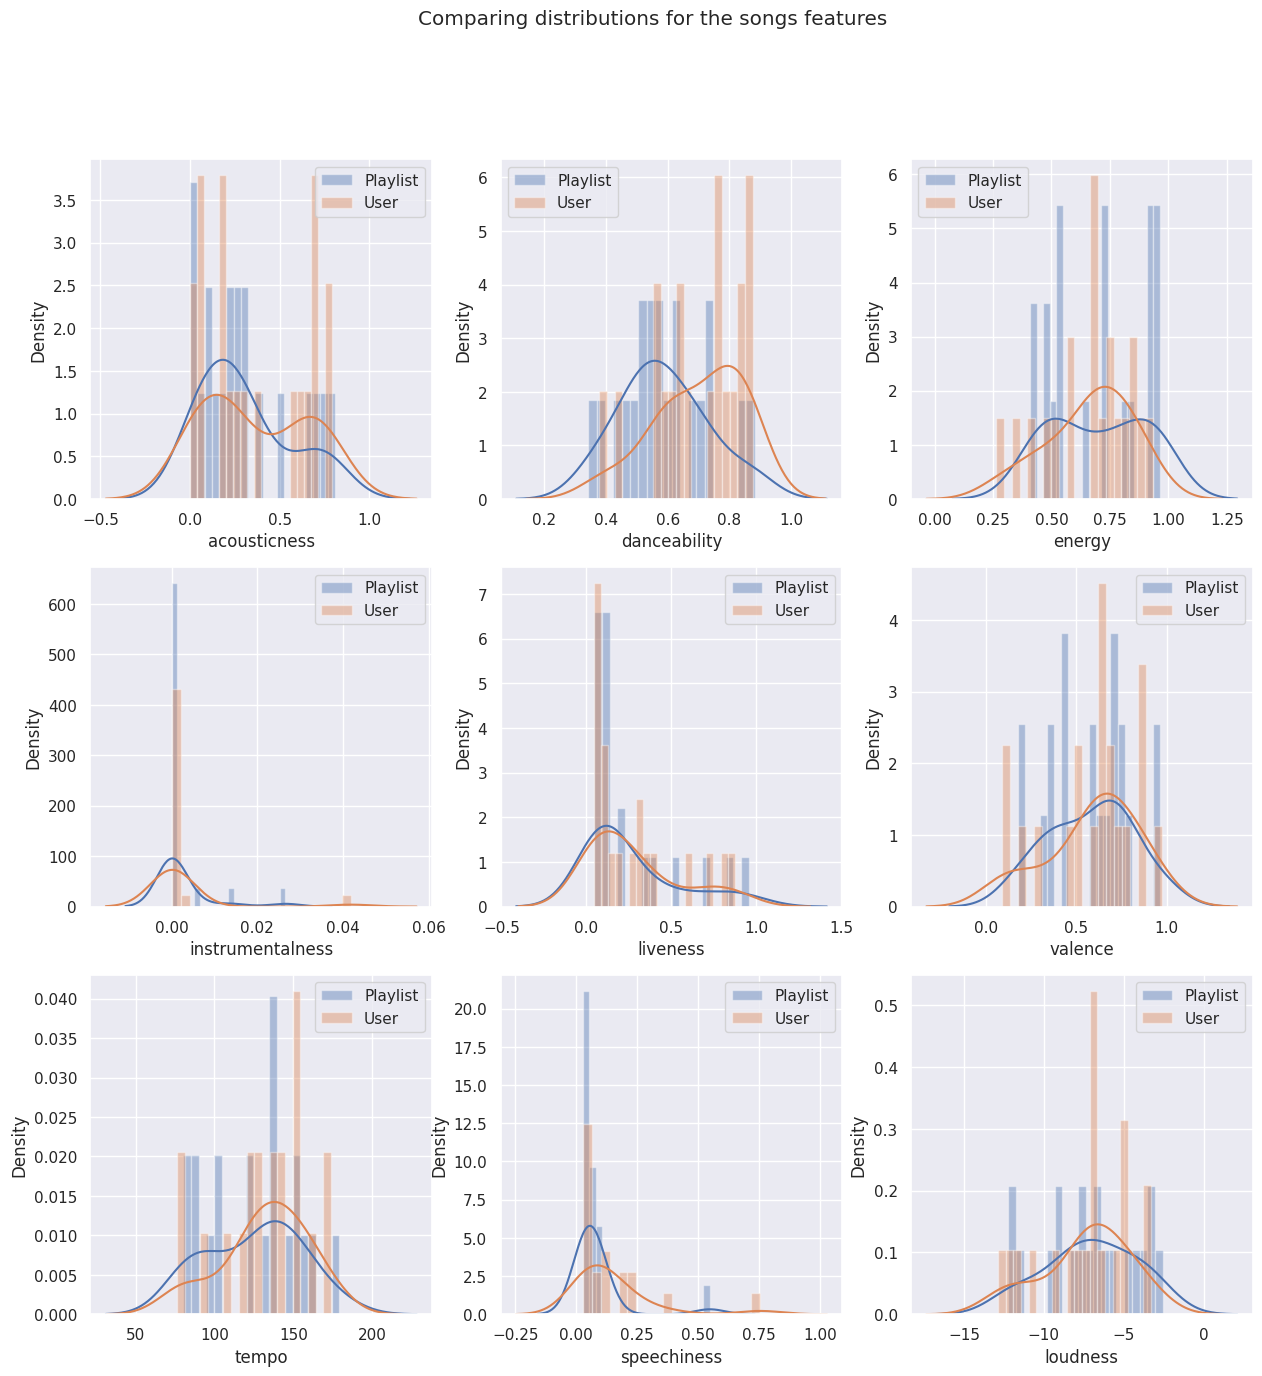

In [ ]:
user_x_playlist = user_sampled.append(playlist)
plot_recomendations_similarities(user_x_playlist, columns_to_cluster)

## Exporting generated playlist

In [ ]:
playlist.drop(columns=columns_to_cluster_scaled, inplace=True)
playlist.to_csv('/content/drive/MyDrive/Group 3 - AI1707 : Music recommendation/Data/my_playlist2.csv', index=False)
